In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
    for i, city in enumerate(cities):

        # Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
            time.sleep(60)

        # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

        # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1
    
# Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

# If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | sipovo
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | bundaberg
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | fillmore
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | comodoro rivadavia
Processing Record 11 of Set 1 | kholodnyy
Processing Record 12 of Set 1 | rio gallegos
Processing Record 13 of Set 1 | linchuan
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | broome
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of Set 1 | wadi maliz

Processing Record 37 of Set 4 | wanaka
Processing Record 38 of Set 4 | alta gracia
Processing Record 39 of Set 4 | heihe
Processing Record 40 of Set 4 | grand-santi
Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | puerto escondido
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | amapa
Processing Record 45 of Set 4 | abhar
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | norwich
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | berlevag
Processing Record 50 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 1 of Set 5 | moerai
Processing Record 2 of Set 5 | laguna
Processing Record 3 of Set 5 | victoria
Processing Record 4 of Set 5 | kokopo
Processing Record 5 of Set 5 | kakching
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | trinidad
Processing Record 8 of Set 5 | howard springs
Processing Record 9 of Set 5 | maldonado
Processing Record 10 of 

Processing Record 24 of Set 8 | salaya
Processing Record 25 of Set 8 | hampton
Processing Record 26 of Set 8 | knysna
Processing Record 27 of Set 8 | hay river
Processing Record 28 of Set 8 | udachnyy
Processing Record 29 of Set 8 | oranjemund
Processing Record 30 of Set 8 | glasgow
Processing Record 31 of Set 8 | yei
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | pitimbu
Processing Record 34 of Set 8 | diffa
Processing Record 35 of Set 8 | padang
Processing Record 36 of Set 8 | yinchuan
Processing Record 37 of Set 8 | fairhope
Processing Record 38 of Set 8 | borogontsy
Processing Record 39 of Set 8 | paucartambo
City not found. Skipping...
Processing Record 40 of Set 8 | gilbues
Processing Record 41 of Set 8 | nuzvid
Processing Record 42 of Set 8 | vitim
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | kikerino
Processing Record 45 of Set 8 | kyaukse
Processing Record 46 of Set 8 | nelson bay
Processing Record 47 of Set 8 | kaliua
P

Processing Record 8 of Set 12 | qaqortoq
Processing Record 9 of Set 12 | samusu
City not found. Skipping...
Processing Record 10 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 11 of Set 12 | tabialan
City not found. Skipping...
Processing Record 12 of Set 12 | pemangkat
Processing Record 13 of Set 12 | townsville
Processing Record 14 of Set 12 | marzuq
Processing Record 15 of Set 12 | bobonong
City not found. Skipping...
Processing Record 16 of Set 12 | patamundai
Processing Record 17 of Set 12 | cayenne
Processing Record 18 of Set 12 | daru
Processing Record 19 of Set 12 | tessalit
Processing Record 20 of Set 12 | brigantine
Processing Record 21 of Set 12 | kulhudhuffushi
Processing Record 22 of Set 12 | pudozh
Processing Record 23 of Set 12 | aswan
Processing Record 24 of Set 12 | zaozhuang
Processing Record 25 of Set 12 | bestobe
Processing Record 26 of Set 12 | allapalli
Processing Record 27 of Set 12 | jiuquan
Processing Record 28 of Set 12 | lar


Processing Record 12 of Set 15 | batagay-alyta
Processing Record 13 of Set 15 | emerald
Processing Record 14 of Set 15 | swan river
Processing Record 15 of Set 15 | college
Processing Record 16 of Set 15 | kaitangata
Processing Record 17 of Set 15 | maroantsetra
Processing Record 18 of Set 15 | desnogorsk
Processing Record 19 of Set 15 | east london
Processing Record 20 of Set 15 | solnechnyy
Processing Record 21 of Set 15 | broken hill
Processing Record 22 of Set 15 | airai
Processing Record 23 of Set 15 | mnogovershinnyy
Processing Record 24 of Set 15 | lahaina
Processing Record 25 of Set 15 | yashkul
Processing Record 26 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 27 of Set 15 | nanortalik
Processing Record 28 of Set 15 | rudnyy
Processing Record 29 of Set 15 | mahebourg
Processing Record 30 of Set 15 | suao
City not found. Skipping...
Processing Record 31 of Set 15 | rungata
City not found. Skipping...
Processing Record 32 of Set 15 | fare
Processing Reco

Processing Record 47 of Set 18 | ilulissat
Processing Record 48 of Set 18 | lata
Processing Record 49 of Set 18 | robertsport
Processing Record 50 of Set 18 | deputatskiy
Processing Record 1 of Set 19 | dalaba
Processing Record 2 of Set 19 | san patricio
Processing Record 3 of Set 19 | hanmer springs
Processing Record 4 of Set 19 | saint-augustin
Processing Record 5 of Set 19 | tigil
Processing Record 6 of Set 19 | ca mau
Processing Record 7 of Set 19 | rocha
Processing Record 8 of Set 19 | koungou
Processing Record 9 of Set 19 | kaeo
Processing Record 10 of Set 19 | tilichiki
Processing Record 11 of Set 19 | yaan
Processing Record 12 of Set 19 | pevek
Processing Record 13 of Set 19 | te anau
Processing Record 14 of Set 19 | fukue
Processing Record 15 of Set 19 | sangre grande
Processing Record 16 of Set 19 | mollendo
Processing Record 17 of Set 19 | constitucion
Processing Record 18 of Set 19 | bismarck
Processing Record 19 of Set 19 | ponta do sol
Processing Record 20 of Set 19 | ake

Processing Record 33 of Set 22 | havre
Processing Record 34 of Set 22 | qasigiannguit
Processing Record 35 of Set 22 | babanusah
City not found. Skipping...
Processing Record 36 of Set 22 | leshukonskoye
Processing Record 37 of Set 22 | sulangan
Processing Record 38 of Set 22 | novi ligure
Processing Record 39 of Set 22 | akonolinga
Processing Record 40 of Set 22 | singapore
Processing Record 41 of Set 22 | varkkallai
Processing Record 42 of Set 22 | dolbeau
City not found. Skipping...
Processing Record 43 of Set 22 | miranorte
City not found. Skipping...
Processing Record 44 of Set 22 | areosa
Processing Record 45 of Set 22 | ranong
Processing Record 46 of Set 22 | mayo
Processing Record 47 of Set 22 | shahpur
Processing Record 48 of Set 22 | umzimvubu
City not found. Skipping...
Processing Record 49 of Set 22 | belmonte
Processing Record 50 of Set 22 | mbanza-ngungu
Processing Record 1 of Set 23 | samalaeulu
City not found. Skipping...
Processing Record 2 of Set 23 | deh rawud
City n

Processing Record 64 of Set 25 | nikolskoye
Processing Record 65 of Set 25 | vila velha
Processing Record 66 of Set 25 | albany
Processing Record 67 of Set 25 | barrow
Processing Record 68 of Set 25 | san diego de la union
Processing Record 69 of Set 25 | taolanaro
City not found. Skipping...
Processing Record 70 of Set 25 | husavik
Processing Record 71 of Set 25 | la ronge
Processing Record 72 of Set 25 | hobart
Processing Record 73 of Set 25 | lebu
Processing Record 74 of Set 25 | atuona
Processing Record 75 of Set 25 | tsihombe
City not found. Skipping...
Processing Record 76 of Set 25 | kruisfontein
Processing Record 1 of Set 26 | lompoc
Processing Record 2 of Set 26 | saint-francois
Processing Record 3 of Set 26 | adrar
Processing Record 4 of Set 26 | la rioja
Processing Record 5 of Set 26 | tuatapere
Processing Record 6 of Set 26 | cape town
Processing Record 7 of Set 26 | cocorit
Processing Record 8 of Set 26 | kavieng
Processing Record 9 of Set 26 | lazaro cardenas
Processing R

Processing Record 22 of Set 29 | upernavik
Processing Record 23 of Set 29 | kapaa
Processing Record 24 of Set 29 | birjand
Processing Record 25 of Set 29 | cape coast
Processing Record 26 of Set 29 | torbay
Processing Record 27 of Set 29 | poronaysk
Processing Record 28 of Set 29 | gusau
Processing Record 29 of Set 29 | karratha
Processing Record 30 of Set 29 | walvis bay
Processing Record 31 of Set 29 | norristown
Processing Record 32 of Set 29 | salihorsk
Processing Record 33 of Set 29 | colares
Processing Record 34 of Set 29 | marrakesh
Processing Record 35 of Set 29 | temir
Processing Record 36 of Set 29 | flinders
Processing Record 37 of Set 29 | hambantota
Processing Record 38 of Set 29 | bloemfontein
Processing Record 39 of Set 29 | guane
Processing Record 40 of Set 29 | talnakh
Processing Record 41 of Set 29 | avera
Processing Record 42 of Set 29 | hualmay
Processing Record 43 of Set 29 | thompson
Processing Record 44 of Set 29 | leningradskiy
Processing Record 45 of Set 29 | v

Processing Record 6 of Set 33 | port hardy
Processing Record 7 of Set 33 | aitape
Processing Record 8 of Set 33 | roald
Processing Record 9 of Set 33 | arlit
Processing Record 10 of Set 33 | penzance
Processing Record 11 of Set 33 | wahpeton
Processing Record 12 of Set 33 | longhua
Processing Record 13 of Set 33 | tasbuget
City not found. Skipping...
Processing Record 14 of Set 33 | coihaique
Processing Record 15 of Set 33 | sobolevo
Processing Record 16 of Set 33 | egvekinot
Processing Record 17 of Set 33 | nishihara
Processing Record 18 of Set 33 | mana
Processing Record 19 of Set 33 | north bend
Processing Record 20 of Set 33 | cabedelo
Processing Record 21 of Set 33 | kilindoni
Processing Record 22 of Set 33 | okha
Processing Record 23 of Set 33 | santa cruz
Processing Record 24 of Set 33 | vao
Processing Record 25 of Set 33 | camden
Processing Record 26 of Set 33 | hanna
Processing Record 27 of Set 33 | severo-kurilsk
Processing Record 28 of Set 33 | hasaki
Processing Record 29 of

Processing Record 36 of Set 36 | ossora
Processing Record 37 of Set 36 | altay
Processing Record 38 of Set 36 | umm lajj
Processing Record 39 of Set 36 | belaya gora
Processing Record 40 of Set 36 | glendive
Processing Record 41 of Set 36 | reyes
Processing Record 42 of Set 36 | tautira
Processing Record 43 of Set 36 | badhni kalan
Processing Record 44 of Set 36 | luau
Processing Record 45 of Set 36 | benton harbor
Processing Record 46 of Set 36 | bria
Processing Record 47 of Set 36 | zhigansk
Processing Record 48 of Set 36 | coahuayana
Processing Record 49 of Set 36 | ayame
Processing Record 50 of Set 36 | anderson
Processing Record 1 of Set 37 | kahului
Processing Record 2 of Set 37 | eskisehir
Processing Record 3 of Set 37 | innisfail
Processing Record 4 of Set 37 | ambon
Processing Record 5 of Set 37 | pavlodar
Processing Record 6 of Set 37 | pacific grove
Processing Record 7 of Set 37 | vorobyevka
Processing Record 8 of Set 37 | waingapu
Processing Record 9 of Set 37 | kaka
Proces

Processing Record 40 of Set 39 | springbok
Processing Record 41 of Set 39 | lorengau
Processing Record 42 of Set 39 | kuzovatovo
Processing Record 43 of Set 39 | souris
Processing Record 44 of Set 39 | elat
Processing Record 45 of Set 39 | olafsvik
Processing Record 46 of Set 39 | sorland
Processing Record 47 of Set 39 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 39 | baykit
Processing Record 49 of Set 39 | jarjis
City not found. Skipping...
Processing Record 50 of Set 39 | kashi
Processing Record 1 of Set 40 | athabasca
Processing Record 2 of Set 40 | russell
Processing Record 3 of Set 40 | grand gaube
Processing Record 4 of Set 40 | luderitz
Processing Record 5 of Set 40 | puerto ayora
Processing Record 6 of Set 40 | khatanga
Processing Record 7 of Set 40 | bilibino
Processing Record 8 of Set 40 | nagua
Processing Record 9 of Set 40 | mar del plata
Processing Record 10 of Set 40 | birao
Processing Record 11 of Set 40 | margate
Processing Record 12 of Set

Processing Record 28 of Set 43 | wenatchee
Processing Record 29 of Set 43 | marcona
City not found. Skipping...
Processing Record 30 of Set 43 | nuevo progreso
Processing Record 31 of Set 43 | korla
Processing Record 32 of Set 43 | santa eulalia del rio
City not found. Skipping...
Processing Record 33 of Set 43 | shubarshi
Processing Record 34 of Set 43 | iqaluit
Processing Record 35 of Set 43 | bosansko grahovo
Processing Record 36 of Set 43 | belushya guba
City not found. Skipping...
Processing Record 37 of Set 43 | mandalgovi
Processing Record 38 of Set 43 | nizhneangarsk
Processing Record 39 of Set 43 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 43 | tateyama
Processing Record 41 of Set 43 | esperance
Processing Record 42 of Set 43 | foshan
Processing Record 43 of Set 43 | lunenburg
Processing Record 44 of Set 43 | verkhoyansk
Processing Record 45 of Set 43 | berbera
Processing Record 46 of Set 43 | baker city
Processing Record 47 of Set 43 | frontera
Proce

Processing Record 7 of Set 47 | ibotirama
Processing Record 8 of Set 47 | oum hadjer
Processing Record 9 of Set 47 | ouro preto do oeste
Processing Record 10 of Set 47 | sungurlu
Processing Record 11 of Set 47 | bambanglipuro
Processing Record 12 of Set 47 | maputo
Processing Record 13 of Set 47 | sumter
Processing Record 14 of Set 47 | bluefields
Processing Record 15 of Set 47 | lavrentiya
Processing Record 16 of Set 47 | tres arroyos
Processing Record 17 of Set 47 | raudeberg
Processing Record 18 of Set 47 | tongren
Processing Record 19 of Set 47 | villazon
Processing Record 20 of Set 47 | port huron
Processing Record 21 of Set 47 | huarmey
Processing Record 22 of Set 47 | ostrovnoy
Processing Record 23 of Set 47 | owerri
Processing Record 24 of Set 47 | tumannyy
City not found. Skipping...
Processing Record 25 of Set 47 | sinnamary
Processing Record 26 of Set 47 | labuhan
Processing Record 27 of Set 47 | havre-saint-pierre
Processing Record 28 of Set 47 | san gil
Processing Record 2

Processing Record 11 of Set 50 | kantang
Processing Record 12 of Set 50 | yumen
Processing Record 13 of Set 50 | ribeira grande
Processing Record 14 of Set 50 | alofi
Processing Record 15 of Set 50 | pisco
Processing Record 16 of Set 50 | ainazi
Processing Record 17 of Set 50 | trincomalee
Processing Record 18 of Set 50 | clarence town
Processing Record 19 of Set 50 | kirakira
Processing Record 20 of Set 50 | cabo san lucas
Processing Record 21 of Set 50 | castro
Processing Record 22 of Set 50 | timizart
Processing Record 23 of Set 50 | haicheng
Processing Record 24 of Set 50 | hofn
Processing Record 25 of Set 50 | atasu
Processing Record 26 of Set 50 | santa cruz de la palma
Processing Record 27 of Set 50 | la peca
Processing Record 28 of Set 50 | hithadhoo
Processing Record 29 of Set 50 | mackay
Processing Record 30 of Set 50 | bluff
Processing Record 31 of Set 50 | qaanaaq
Processing Record 32 of Set 50 | boz
Processing Record 33 of Set 50 | byron bay
Processing Record 34 of Set 50 

Processing Record 46 of Set 53 | rio grande city
Processing Record 47 of Set 53 | mahaicony
City not found. Skipping...
Processing Record 48 of Set 53 | warah
Processing Record 49 of Set 53 | sitka
Processing Record 50 of Set 53 | sao joao da barra
Processing Record 1 of Set 54 | erzin
Processing Record 2 of Set 54 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 54 | mogapi
Processing Record 4 of Set 54 | san quintin
Processing Record 5 of Set 54 | westport
Processing Record 6 of Set 54 | general roca
Processing Record 7 of Set 54 | komsomolskiy
Processing Record 8 of Set 54 | mecca
Processing Record 9 of Set 54 | abnub
Processing Record 10 of Set 54 | fairbanks
Processing Record 11 of Set 54 | bereznehuvate
Processing Record 12 of Set 54 | bambous virieux
Processing Record 13 of Set 54 | banjar
Processing Record 14 of Set 54 | taltal
Processing Record 15 of Set 54 | elban
Processing Record 16 of Set 54 | spoleto
Processing Record 17 of Set 54 | gat
Proc

KeyboardInterrupt: 

In [10]:
len(city_data)

2580

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.56,100,75,5.75,TO,2022-08-07 16:21:06
1,Rikitea,-23.1203,-134.9692,71.11,64,100,29.19,PF,2022-08-07 16:21:06
2,Arraial Do Cabo,-22.9661,-42.0278,80.56,65,75,12.66,BR,2022-08-07 16:21:06
3,Sipovo,44.2814,17.0839,82.89,46,58,9.33,BA,2022-08-07 16:21:07
4,Carnarvon,-24.8667,113.6333,64.83,68,0,13.78,AU,2022-08-07 16:21:07
5,Bundaberg,-24.8500,152.3500,51.22,75,0,1.01,AU,2022-08-07 16:21:07
6,Ushuaia,-54.8000,-68.3000,38.86,81,0,4.61,AR,2022-08-07 16:20:34
7,Fillmore,43.6666,-92.1002,75.34,94,75,5.75,US,2022-08-07 16:21:07
8,Comodoro Rivadavia,-45.8667,-67.5000,42.66,87,40,6.91,AR,2022-08-07 16:21:08
9,Kholodnyy,62.7167,147.9500,54.19,80,34,4.88,RU,2022-08-07 16:21:08


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-08-07 16:21:06,-21.2000,-175.2000,73.56,100,75,5.75
1,Rikitea,PF,2022-08-07 16:21:06,-23.1203,-134.9692,71.11,64,100,29.19
2,Arraial Do Cabo,BR,2022-08-07 16:21:06,-22.9661,-42.0278,80.56,65,75,12.66
3,Sipovo,BA,2022-08-07 16:21:07,44.2814,17.0839,82.89,46,58,9.33
4,Carnarvon,AU,2022-08-07 16:21:07,-24.8667,113.6333,64.83,68,0,13.78
5,Bundaberg,AU,2022-08-07 16:21:07,-24.8500,152.3500,51.22,75,0,1.01
6,Ushuaia,AR,2022-08-07 16:20:34,-54.8000,-68.3000,38.86,81,0,4.61
7,Fillmore,US,2022-08-07 16:21:07,43.6666,-92.1002,75.34,94,75,5.75
8,Comodoro Rivadavia,AR,2022-08-07 16:21:08,-45.8667,-67.5000,42.66,87,40,6.91
9,Kholodnyy,RU,2022-08-07 16:21:08,62.7167,147.9500,54.19,80,34,4.88


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

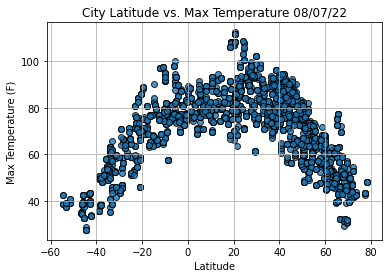

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

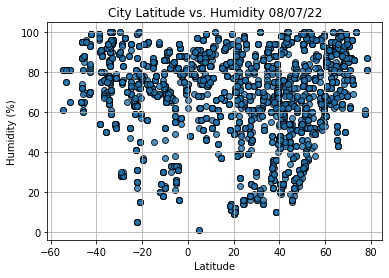

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

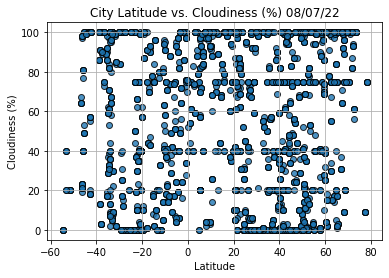

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

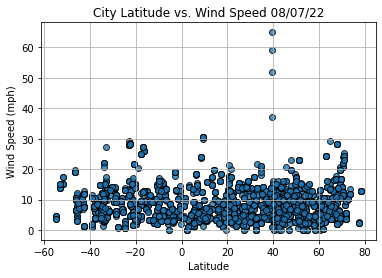

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Sipovo,BA,2022-08-07 16:21:07,44.2814,17.0839,82.89,46,58,9.33
7,Fillmore,US,2022-08-07 16:21:07,43.6666,-92.1002,75.34,94,75,5.75
9,Kholodnyy,RU,2022-08-07 16:21:08,62.7167,147.9500,54.19,80,34,4.88
13,Yellowknife,CA,2022-08-07 16:21:10,62.4560,-114.3525,61.32,72,75,5.75
14,Broome,US,2022-08-07 16:21:10,42.2506,-75.8330,85.19,74,100,10.36


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

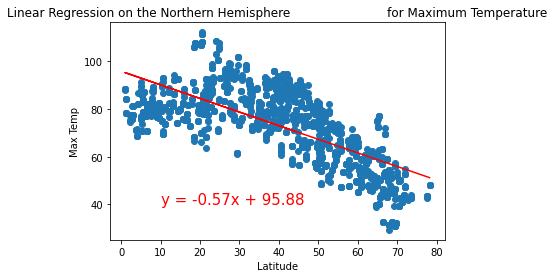

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

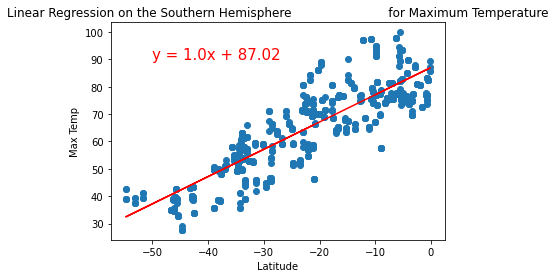

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

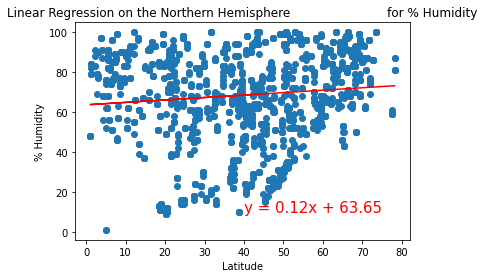

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

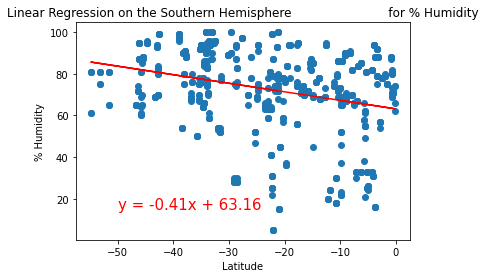

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

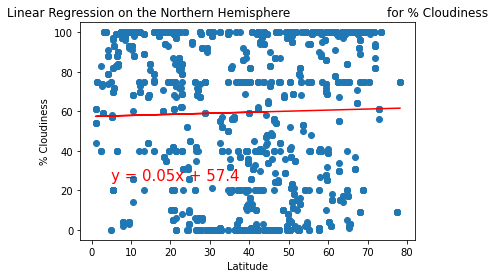

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(5,25))

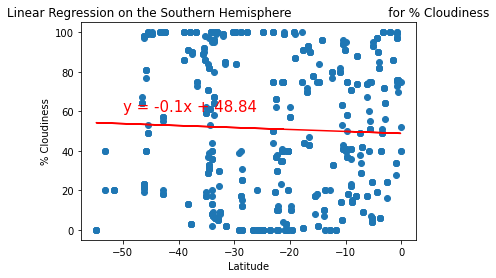

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

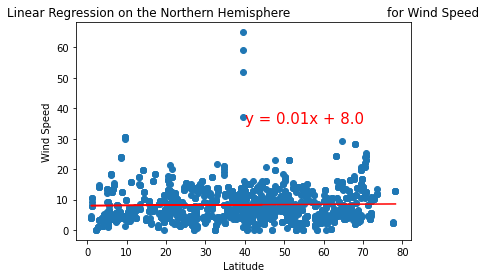

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

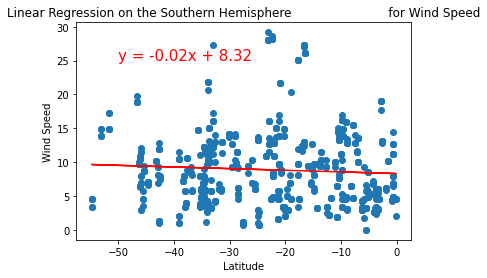

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))